# Projet traitement des images par seam carving

>L’objectif de ce traitement est de réduire la taille d’une image (sa largeur en l’occurrence) de façon intelligente. Pour
ce faire, au lieu de simplement supprimer une bande verticale dans l’image, nous allons supprimer plusieurs
fois des bandes de 1 pixel de large en sélectionnant les pixels les « moins intéressants » de l’image.

**Auteur :**  **Éric NICOLAS** École Supérieure d’Ingénieurs de Paris Est

Projet repris par **Régis Allemand ; Thierry Dalut et Gilles Itier**

# Cahier des charges

Vous devez réaliser des fonctions permettant de mettre en oeuvre les différentes techniques de traitement des images par seam carving. Essayer de respecter ce qu'il est proposé de faire.   

### Dans vos programmes vous devez :  
* **Expliquer chacune des fonctions créées** , c'est-à-dire écrire une documentation de la fonction (docstring). Cette documentation devra expliquer le principe de la transformation réalisée par votre code python.  
* **Commenter certaines lignes** pour montrer les points importants de votre code. 
* Ecrire un jeu de test pertinent pour chacune d'elle.  
* Utiliser des variables avec des noms explicites.

### Rédaction d'un dossier d'accompagnement présentant  :  
* la recherche documentaire nécessaire pour réaliser votre projet (sitographie / bibliographie )
* le **partage des tâches réalisées** au sein de votre équipe.  
* une **conclusion** sur les points d'améliorations possible de votre programme (correction de bug et extension). 
* ce que vous avez aimé ou pas aimé faire dans ce projet et en NSI de manière générale. 

**Récupérer le fichier `docts_seam_carving.pdf` (dans les fichiers joints à ce notebook). Il contient des documents à compléter et à intégrer à votre dossier**

# Présentation du projet  
Afin de présenter cette technique, nous allons travailler avec une image d'exemple et nous allons comparer les résultats obtenus via un traitement standard avec ceux que le seam carving nous permettent d'obtenir.
Partons de de l’image suivante, que l’on souhaite faire tenir dans un carré :

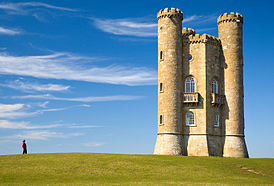

<div align="center">Image originale</div>

Les deux traitement typiques que l’on pourrait appliquer sont :
 * le rognage, mais cela "coupe" le château, ainsi que
 * le redimensionnement, mais cela "écrase" le château.

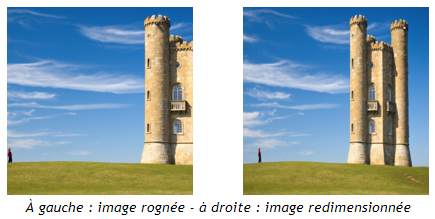

Le résultat que nous aurions en utilisant le **seam carving** serait le suivant : l'image serait **redimensionnée intelligemment** aux proportions souhaitées, en **conservant les aspects** des différents objets qui semblent être les principaux sujets représentés.
Voici donc ci-dessous l'illustration de l'application de la technique du seam carving pour répondre à notre problématique :

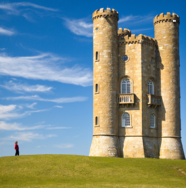

<div align="center">Image redimensionnée intelligemment</div>

En comparant l’image originale et celle obtenue après traitement, on constate que les éléments qui la composent ont **gardé leur aspect, leurs proportions**, mais on été **rapprochés** : c’est basiquement ce que propose le **seam carving**.

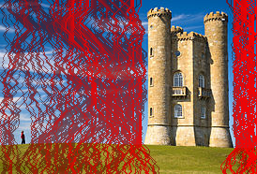

Le **seam carving** va supprimer des lignes (couture ou **seam** en anglais) « verticales » en sculptant (**carving**) un chemin dans l’image de haut en bas.

Ainsi, nous avons pu aborder ce que cette méthode fait ; **voyons à présent comment cela fonctionne et quel est concrètement l'apport de la programmation dynamique dans la mise en place de cette fonctionnalité.**

## 1- Fonctionnement de la technique du seam carving

Le premier traitement à effectuer sur l'image à redimensionner est le **calcul du poids** (on parle aussi parfois de **densité** ou **d'énergie**) de chaque pixel de l'image, afin d'obtenir **une carte des zones de haute énergie**, comme illustré sur les figures suivantes :

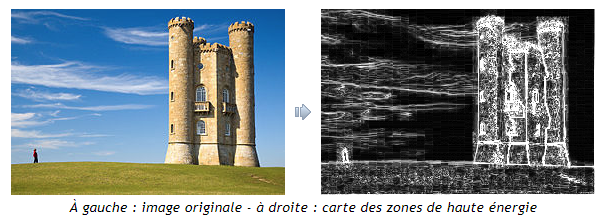

Dans la figure à droite, ci-dessus, plus une zone est **dense**, plus elle est **blanche**. Ainsi les zones de **densité très faibles** sont **noires** et ne sont pas intéressantes du point de vu du contenu de notre image : elles ne représentent **pas de sujet** avec un aspect ou des proportions particulières ; on pourrait les écraser ou les étirer sans que cela ne soit perturbant. 
On remarque donc que les les **zones de haute densité** sont essentiellement agglomérées au **niveau du chateau** et du **personnage**, mais également au niveau de certains motifs que l'on retrouve dans les nuages.

Par souci de simplicité, nous travaillerons dans la suite avec des images en niveaux de gris.

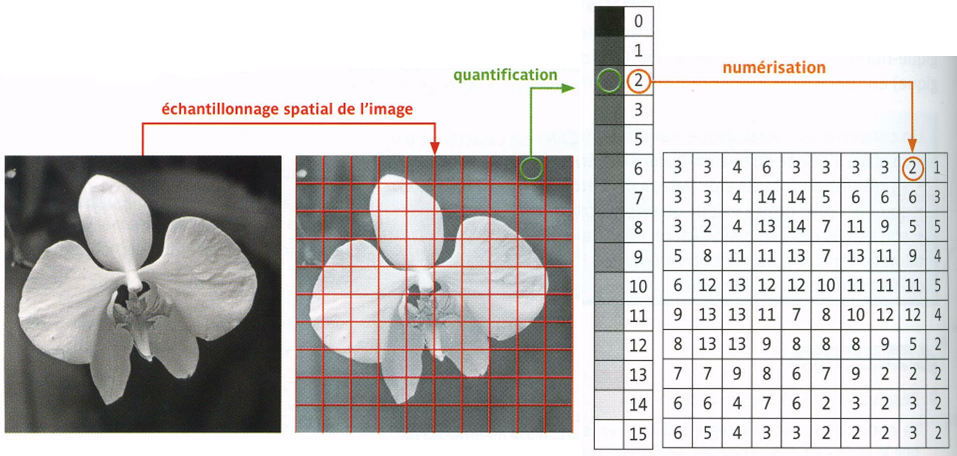

Sur cette image chaque pixel est codé sur 4 bits. 4 bits peuvent coder 24 d’où 16 niveaux de gris possibles.  
De nos jours, les images sont généralement codées sur 8 bits.  
**Elles ont donc des valeurs de pixel comprises entre 0 et 255 soit $2^8 = 256$ valeurs**

On supposera que les images sont codées par une matrice d'entiers (une liste de listes). Chaque case de la matrice correspondant à un pixel de l'image.  
La valeur 0 correspond au noir et la valeur 255 au blanc.

### Comment choisir les pixels à supprimer de l'image d'origine
Pour chaque pixel de la `matrice image I`, on calcule son **énergie** qui **code son importance**.  
Plus l'énergie est grande plus le pixel est important. **Ces valeurs sont mémorisées dans une nouvelle matrice appelée matrice énergie et notée `E`.**  
On peut penser à plusieurs définitions pour l’énergie.   
Pour ce projet on définira l’énergie du pixel de coordonnées $(i,j)$ avec **`i` représentant les lignes** et **`j` les colonnes**, on a alors la relation :

$ \sqrt{(I_{i,j-1} - I_{i,j+1})^2 + (I_{i-1,j} - I_{i+1,j})^2 } $


         i-1,j       
    
    i,j-1  i,j  i,j+1
         
         i+1,j

Pour cette matrice image I, **il faut obtenir la matrice énergie E correspondante** (les valeurs seront arrondies au dixième)

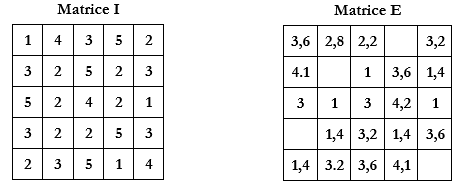

Pour les pixels situés sur les bords de l'image (**non compris les 4 angles**), la formule est un peu différente :
* si le pixel est situé sur la colonne 0 (j=0), il n'y a pas de pixel en j-1, la formule est la suivante :
$ \sqrt{(I_{i,j} - I_{i,j+1})^2 + (I_{i-1,j} - I_{i+1,j})^2 } $
* si le pixel est situé sur la dernière colonne, il n'y a pas de pixel en j+1, la formule est la suivante :
$ \sqrt{(I_{i,j-1} - I_{i,j})^2 + (I_{i-1,j} - I_{i+1,j})^2 } $

* si le pixel est situé sur la ligne 0 (i=0), il n'y a pas de pixel en i-1, la formule est la suivante :
$ \sqrt{(I_{i,j-1} - I_{i,j+1})^2 + (I_{i,j} - I_{i+1,j})^2 } $
* si le pixel est situé sur la dernière ligne, il n'y a pas de pixel en i+1, la formule est la suivante :
$ \sqrt{(I_{i,j-1} - I_{i,j+1})^2 + (I_{i-1,j} - I_{i,j})^2 } $

Pour les 4 angles :
* en haut à gauche : $ \sqrt{(I_{i,j} - I_{i,j+1})^2 + (I_{i,j} - I_{i+1,j})^2 } $  
* en haut à droite : $ \sqrt{(I_{i,j-1} - I_{i,j})^2 + (I_{i,j} - I_{i+1,j})^2 } $
* en bas à gauche : $ \sqrt{(I_{i,j} - I_{i,j+1})^2 + (I_{i-1,j} - I_{i,j})^2 } $
* en bas à droite : $ \sqrt{(I_{i,j-1} - I_{i,j})^2 + (I_{i-1,j} - I_{i,j})^2 } $

### Obtention de la matrice d'énergie

Il faudra :
* **écrire une matrice** qui correspond à une **image** (la `Matrice I` ci-dessus est un bon exemple)
* **écrire une fonction `energie`** qui prend en paramètres une **matrice d'image**  et **renvoie sa matrice d'énergie** en utilisant les formules fournies.  
Aide : vous devez donc parcourir la matrice (liste de liste) et appliquer la formule pour chaque valeurs de la liste en fonction de sa position dans la matrice. Une boucle pour les valeurs centrales, une autre pour les valeurs des côtés verticaux, une autre pour les valeurs des côtés horizontaux et 4 lignes pour les 4 angles.  
Vérifiez que vous obtenez la bonne matrice à partir des valeurs données ci-dessus dans la `matrice E` et compléter les valeurs manquantes.

In [ ]:
from math import sqrt

def energie(I):
    '''génération de la matrice énergie E correspondante à la matrice image I'''
    ...
    
I = ...
print(energie(I))

À présent, pour diminuer la largeur de l’image, nous allons chercher à déterminer des chemins verticaux qui traversent le moins de zones d’énergie, pour ciseler l’image en retirant une à une chaque « couture » (en anglais : seam) de moindre importance. 
L’idée est qu’à chaque seam soustrait, l’image est moins large d’un pixel.

## 2ème partie : Une première approche : technique gloutonne

**Principe de l’algorithme glouton sur un exemple** :  
Pour la case de coordonnées (0,2) de la première ligne de la matrice énergie E ci-dessous, on calcule le chemin de moindre énergie en choisissant à chaque changement de ligne **la case de valeur mini** parmi les 2 ou 3 cases adjacentes de la ligne suivante. 


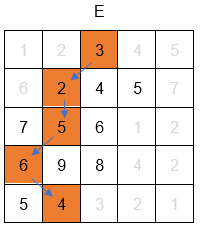

Dans un premier temps, il faut : 
* **écrire une fonction `min_nrj_colonne`** qui prend en paramètres la matrice d'énergie `E` et l'indice `k` d'une colonne et qui renvoie la **somme des énergies minimales** en partant de la colonne `k`  pour arriver en bas de la matrice `E`  

Exemple : dans le cas de la matrice d'énergie ci-dessus et en partant de la colonne `2`, la somme des énergies minimales est `20` .  
Attention à traiter les cas particulier des pixels situés sur les bords ainsi que les cas ou l'on commence en 1ère et dernière colonne.  
Rappel : `min(4,5) renvoie 4`

In [ ]:
E=[[1,2,3,4,5],
   [6,2,4,5,7],
   [7,5,6,1,2],
   [6,9,8,4,2],
   [5,4,3,2,1]]


def min_nrj_colonne(E,k):
    '''fonction qui prend en entrée la matrice énergie E et
    l'indice k d'une colonne et renvoie la somme des énergies minimales en partant de la colonne k
    '''
    ...


print(min_nrj_colonne(E,1)) # doit renvoyer 19
print(min_nrj_colonne(E,2)) # doit renvoyer 20

Dans un second temps :
* **Implémentez la fonction `chemin_min_nrj_image(E)`** qui renvoie **la liste des énergies minimales** des chemins partant de chaque case de la première ligne de la matrice E.
Faites appel à la fonction précédemment complétée.  
Testez votre travail.

In [ ]:
# votre code ci-dessous
def chemin_min_nrj_image(E):
    ...

print(chemin_min_nrj_image(E)) # doit renvoyer [18, 19, 20, 12, 14]

Vous connaissez maintenant la colonne qui, en partant de celle-ci, effectue un trajet d'énergie minimale.  
Dans l'exemple précédent, on obtenait `[18, 19, 20, 12, 14]` ce qui signifie qu'en partant de la colonne `3` , on effectuera un trajet d'énergie minimale en suivant l'algorithme glouton.  

Il faut maintenant **déterminer** les pixels à enlever de l'image, pour cela, il faut connaître le chemin pris pour obtenir ce minimum d'énergie et récupérer les coordonnées de chaque case empruntée durant ce chemin. 

Dans un premier temps, **réflechissez aux valeurs à retirer avec l'exemple précédent** .  
Puis, **quelle sera selon vous la structure la plus adaptée pour "mémoriser" les valeurs des cases à supprimer** .  

Il faudra alors :
* **modifier la fonction `min_nrj_colonne`** pour qu'elle renvoie, en plus de la somme des énergies minimales en partant de la colonne `k`, les coordonées des cases parcourues pour obtenir cette somme minimale. 

Dans la cellule code ci-dessous, **complétez la fonction `min_nrj_colonne(E,k)`** de votre script précédent afin qu’il effectue ce travail. 

In [ ]:
# votre code ci-dessous
E=[[1,2,3,4,5],
   [6,2,4,5,7],
   [7,5,6,1,2],
   [6,9,8,4,2],
   [5,4,3,2,1]]

def min_nrj_colonne(E,k):
    ...

    
print(min_nrj_colonne(E,3))

Dans un second temps, il faut **modifier** la fonction `chemin_min_nrj_image` pour qu'elle continue à tester chaque case de la première ligne de la matrice E mais elle renvoie cette fois une `liste des coordonnées` des cases correspondant au chemin d'énergie minimale.   

In [ ]:

def chemin_min_nrj_image(E):
    '''fonction qui prend la matrice énergie E et renvoie le chemin minimal sous forme d'une liste'''
    ...

print(...) # doit renvoyer [(0, 3), (1, 2), (2, 3), (3, 4), (4, 4)]

Maintenant que vous connaissez les cases à supprimer, il faut pouvoir les retirer de la matrice correspondant à l'image.  
* **Trouver** comment faire pour retirer un élément d'une liste.  
* **Tester** la méthode trouvée pour retirer le 1er pixel de la matrice image `I`. Le 1er pixel correspond à la 1ère coordonnées obtenue dans la liste renvoyée par la fonction `chemin_min_nrj_image`
* **Créer** alors une fonction `retire_px` qui prend en argument la `matrice I` des pixels de l'image et la `liste C` des coordonnées des pixels obtenue par la fonction `chemin_min_nrj_image` et qui **retire tous les pixels du chemin d'énergie minimale**.

In [ ]:
E=[[1,2,3,4,5],
   [6,2,4,5,7],
   [7,5,6,1,2],
   [6,9,8,4,2],
   [5,4,3,2,1]]

I = ...
C = chemin_min_nrj_image(E)

def retire_px(I,C):
    '''fonction qui retire les pixels de l'image I (liste de listes) 
        connaissant les coordonnées (C = liste de doublet) 
        obtenue par la fonction chemin_min_nrj_image'''
    ...
    
print(I)
print(C)
print(retire_px(I,C)) # renvoie [[1, 4, 3, 2], [3, 2, 2, 3], [5, 2, 4, 1], [3, 2, 2, 5], [2, 3, 5, 1]]

En guise de test :  
A partir de la `matrice d'image I`, retrouvez la véritable `matrice d'énergie E`, puis trouvez, dans celle-ci, le **chemin minimale d'énergie**. 
**Retirer enfin les pixels de ce chemin à la matrice image I**  
Vous compléterez l'image de la `matrice E` ci-dessous de la même manière que celle présentée au début de la 2ème partie.   Vous compléterez également la `matrice I` après traitement (les images sont à imprimer ou à télécharger puis à compléter)

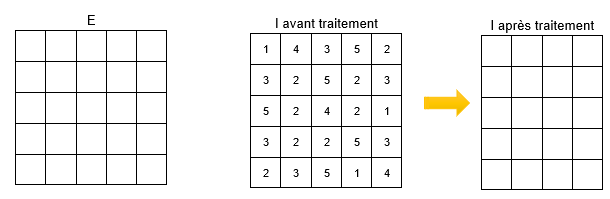

Pour terminer, vérifions que cela fonctionne avec l'image du chateau en noir et blanc.  
**Exécutez la cellule code suivante**

In [ ]:
from math import sqrt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from time import time


"""===================================AFFICHAGE DE L'IMAGE============================="""

#lecture d'une image png en NB (marche aussi avec celle en couleur) et transformation en un tableau I
im=Image.open(("Images/chateau_nb.png")) #ouverture
T=np.array(im)#transformation de l'image en tableau numpy
I=T.tolist()#transformation du tableau numpy en liste python

plt.imshow(I,cmap = 'gray')#si on veut d'abord voir l'image non traitée dans une fenêtre de matplotlib
plt.show()

#fonction qui enlève n colonnes dans matrice I représentant l'image
def image_traitee(I,n):
    for i in range(n):
        retire_px(I,chemin_min_nrj_image(energie(I)))
    return I

deb=time()
plt.imshow(image_traitee(I,100),cmap = 'gray')
plt.show()
fin=time()
print("Le temps de traitement est de :",fin-deb,"s")

## 3ème partie : Une autre approche : un traitement en programmation dynamique

Reprenons la matrice énergie E utilisée dans la partie précédente.
 **Le chemin trouvé par l’algorithme glouton est-il le meilleur ?**

 S’il ne l’est-pas, trouvez sur la matrice ci-dessous, un chemin de plus faible énergie et donnez sa valeur. 

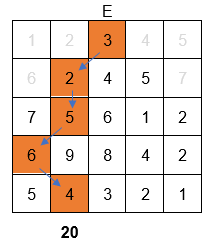

À partir de cette matrice, nous allons construire une matrice **d’énergie cumulée** `E_cum` .   
Pour une case donnée, on regarde **les trois cases adjacentes du <u>dessus</u>**. 

 On choisit celle de **plus faible énergie** que l’on **additionne à l’énergie de la case en cours**. 


Dans l’exemple ci-dessous, la case en cours a une valeur d’énergie égale à 4. La valeur de plus faible énergie des trois cases adjacentes du dessus (le 2 de la case de gauche), lui est ajoutée. On obtient la valeur 6 que l’on note dans la case.


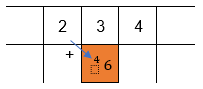

**Répétez ce processus pour toutes les cases vides de la matrice E cumulé ci-dessous.**

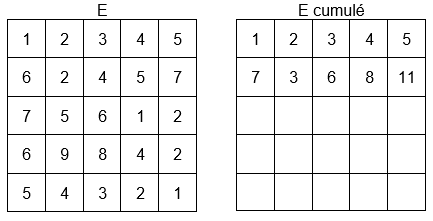

Il faut maintenant :  
* **écrire une fonction `energie_cum`** qui prend en paramètre la matrice d'énergie `E`,  qui calcule les énergies cumulées et qui renvoie la matrice `E d'énergie cumulé` .   
Attention au cas particulier des cases situées sur la 1ère et dernière colonne.

In [ ]:
E=[[1,2,3,4,5],
   [6,2,4,5,7],
   [7,5,6,1,2],
   [6,9,8,4,2],
   [5,4,3,2,1]]

def energie_cum(E) :
    '''fonction qui calcule pour caque case l énergie cumulée en utilisant les valeurs des cases situées au dessus
    d elle. Elle renvoie la matrice des énergies cumulées
    ...
    
    return ...

Maintenant que vous avez obtenue cette matrice `E d'énergie cumulé`  
**Que représente les valeurs de la dernière ligne de cette matrice E d'énergie cumulé ?** .  
Et donc **quelle case choisir pour décider du chemin vertical à soustraire à l’image ?**  

Pour cette case, **reconstituez alors le chemin ayant permis d’obtenir cette valeur** en le coloriant et le fléchant sur la matrice ci-contre.

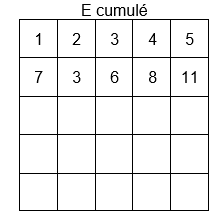

Vous aurez remarqué que pour trouver le chemin, **on part de la case d'énergie minimale** de la dernière ligne et on **remonte** la matrice d'énergie cumulée en choisissant (un peu comme dans l'algorithme glouton) parmis les 3 cases **au-dessus** la case d'énergie cumulée minimale. (ou 2 cases si on est au bord de la matrice).  
Il faut donc :  
* **écrire une fonction `chemin_min_nrj_image_dyn`** qui prend en argument la `matrice d'énergie cumulée` et qui renvoie le `chemin d'énergie cumulée minimale` sous la forme d'une `liste des coordonnées` des cases correspondant au chemin suivi.  

Aide : Pour remonter dans la matrice, une boucle qui parcourt les lignes à l'envers parait une bonne idée :  
` for i in range(ligne_depart, -1, -1)`  
Vous pouvez utiliser la méthode `index` pour récupérer des indices de `lignes` et `colonnes` et la méthode `insert` pour insérer des valeurs à un indice dans une liste.  
N'oubliez pas de traiter les cases sur les côtés de la matrice.  
Cette question est difficile.

In [ ]:
E=[[1,2,3,4,5],
   [6,2,4,5,7],
   [7,5,6,1,2],
   [6,9,8,4,2],
   [5,4,3,2,1]]


def chemin_min_nrj_image_dyn(E):
    '''fonction qui prend la matrice énergie cumulée E et renvoie le chemin minimal
    sous la forme d'une liste appelée chemin contenant l'indice, pour chaque ligne, 
    de la colonne correspondant à l'énergie minimale'''
    ...
    
    return chemin

Vous pouvez maintenant utiliser la fonction  `retire_px` qui prend en argument la `matrice I` des pixels de l'image et la `liste chemin` des coordonnées des pixels obtenue par la fonction `chemin_min_nrj_image_dyn` et qui **retire tous les pixels du chemin d'énergie minimale**.

9. En utilisant le code ci-dessous **qu'il vous faudra compléter**, à partir de la matrice d'image I, retrouvez la véritable matrice d'énergie E cumulé , puis trouvez, dans celle-ci, le **chemin minimale d'énergie**. 
 **Retirer enfin les pixels de ce chemin à la matrice image I**  
 Vous compléterez l'image de la matrice E cumulé ci-dessous de la même manière que celle présentée au début de la 3ème partie.   Vous compléterez également la matrice I après traitement (les images sont à imprimer ou à télécharger puis à compléter)

In [ ]:
from math import sqrt

I=[[1,4,3,5,2],
   [3,2,5,2,3],
   [5,2,4,2,1],
   [3,2,2,5,3],
   [2,3,5,1,4]]

E = ...

print("La matrice d'énergie de départ est :\n",E)
print()

E_cumul = energie_cum(E)
print("La matrice énergie E cumulé correspondante est :\n",E_cumul )
print()

chemin = chemin_min_nrj_image_dyn(E_cumul)
print("Le chemin minimal dans la matrice est :\n",chemin )
print()

def retire_px(...,....):
    '''fonction qui retire les pixels de l'image I (liste de listes) 
        connaissant les coordonnées (chemin = liste de doublet) 
        obtenue par la fonction chemin_min_nrj_image_dyn'''
    ...

I_modif = retire_px(...., ...)
print("La matrice image I après retrait des pixels du chemin d'énergie mini est :\n",I_modif)
   

En guise de test :  
A partir de la `matrice d'image I`, retrouvez la véritable `matrice d'énergie E`, puis trouvez la `matrice d'énergie E cumulé` puis dans celle-ci, le **chemin minimale d'énergie**. 
**Retirer enfin les pixels de ce chemin à la matrice image I**  
Vous compléterez l'image de la `matrice E cumulé` ci-dessous de la même manière que celle présentée au début de la 2ème partie.   Vous compléterez également la `matrice I` après traitement (les images sont à imprimer ou à télécharger puis à compléter)

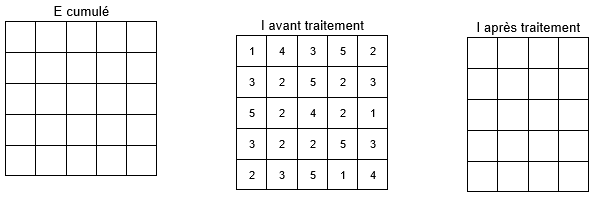

Pour terminer, vérifions que cela fonctionne avec l'image du chateau en noir et blanc.  
**Exécutez la cellule code suivante**

In [ ]:
from math import sqrt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from time import time


"""===================================AFFICHAGE DE L'IMAGE============================="""

#lecture d'une image png en NB (marche aussi avec celle en couleur) et transformation en un tableau I
im=Image.open(("Images/chateau_nb.png")) #ouverture
T=np.array(im)#transformation de l'image en tableau numpy
I=T.tolist()#transformation du tableau numpy en liste python

plt.imshow(I,cmap = 'gray')#si on veut d'abord voir l'image non traitée dans une fenêtre de matplotlib
plt.show()

#fonction qui enlève n colonnes dans matrice I représentant l'image
def image_traitee(I,n):
    for i in range(n):
        retire_px(I,chemin_min_nrj_image_dyn(energie_cum(energie(I))))
    return I

deb=time()
plt.imshow(image_traitee(I,100),cmap = 'gray')
plt.show()
fin=time()
print("Le temps de traitement est de :",fin-deb,"s")

## 4ème partie : comparaison algorithme glouton / dynamique

Afin de comparer les performances de ces 2 approches algorithmiques, vous allez exécuter chaque algorithme sur quelques images ; l'objectif étant de les redimensionner afin de rendre leurs proportions carrées.  

**Exécuter les 2 scripts de la fin de la partie 2 et de la partie 2 sur les images fournies, analysez les images obtenues puis compléter le tableau ci-dessous :**

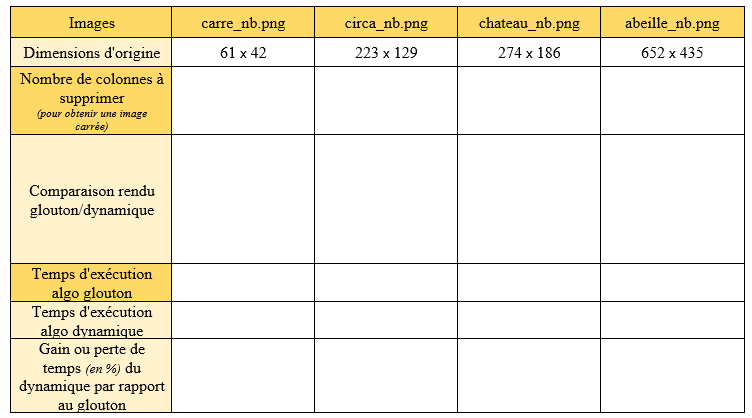

 3.	Rédigez, ci-dessous, une synthèse de quelques lignes permettant de savoir **"Ce qu'il faut retenir !"** de cette activité.